<a href="https://colab.research.google.com/github/24pa1a4561-lab/Registration-form/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd

In [84]:
teams=pd.read_csv('/content/teams.csv')
teams=teams[["team","country","year","events","athletes","age","prev_medals","medals"]]
teams.head()


,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0


In [85]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   country      2144 non-null   object 
 2   year         2144 non-null   int64  
 3   events       2144 non-null   int64  
 4   athletes     2144 non-null   int64  
 5   age          2144 non-null   float64
 6   prev_medals  2014 non-null   float64
 7   medals       2144 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 134.1+ KB


In [86]:
teams.describe()

,year,events,athletes,age,prev_medals,medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2144.000000
mean,1994.507463,35.724813,73.693097,24.778591,10.248759,10.556437
std,15.384205,49.490270,127.907577,2.808559,31.951920,33.028143
min,1964.000000,1.000000,1.000000,17.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,0.000000,0.000000
75%,2008.000000,44.000000,70.250000,26.100000,4.000000,4.000000
max,2016.000000,270.000000,839.000000,66.000000,442.000000,442.000000


In [87]:
teams["medals"].describe()

,medals
count,2144.000000
mean,10.556437
std,33.028143
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,442.000000


In [88]:
teams

,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [89]:
teams.isnull().sum()

,0
team,0
country,0
year,0
events,0
athletes,0
age,0
prev_medals,130
medals,0


In [90]:
teams[teams.isnull().any(axis=1)]

,team,country,year,events,athletes,age,prev_medals,medals
19,ALB,Albania,1992,8,9,25.3,NaN,0
26,ALG,Algeria,1964,7,7,26.0,NaN,0
39,AND,Andorra,1976,2,3,28.3,NaN,0
50,ANG,Angola,1980,14,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,11,17,23.2,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,5,23.6,NaN,0


In [91]:
teams=teams.dropna()
teams

,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [93]:
teams=teams.drop(columns=["team","country"])

In [94]:
teams.corr()["medals"]

,medals
year,-0.034870
events,0.770646
athletes,0.839909
age,0.023231
prev_medals,0.920048
medals,1.000000


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

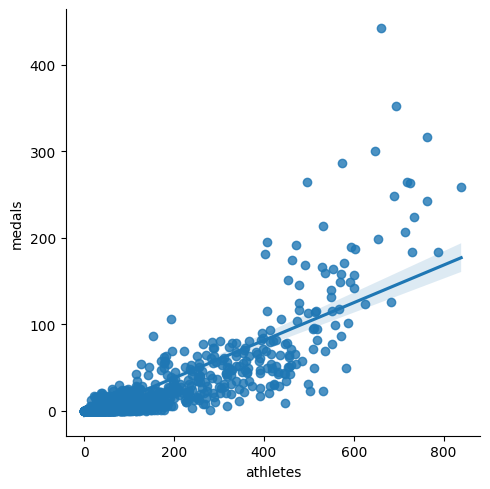

In [97]:
sns.lmplot(x="athletes",y="medals",data=teams)

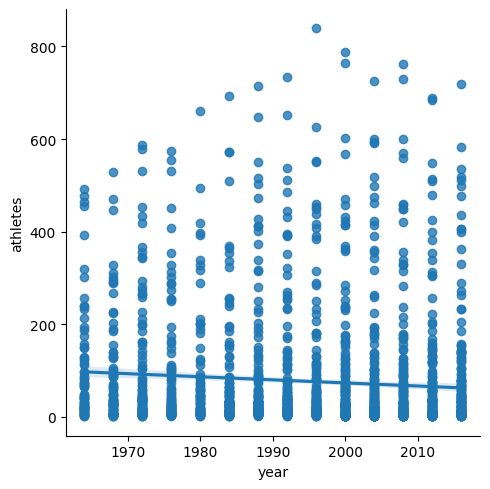

In [98]:
sns.lmplot(x="year",y="athletes",data=teams)

<Axes: ylabel='Frequency'>

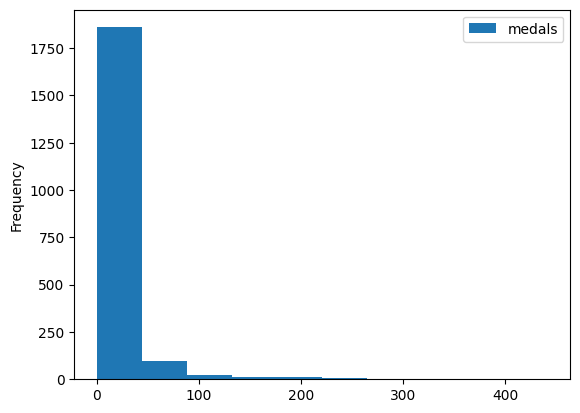

In [99]:
teams.plot.hist(y="medals")

<Axes: xlabel='age', ylabel='athletes'>

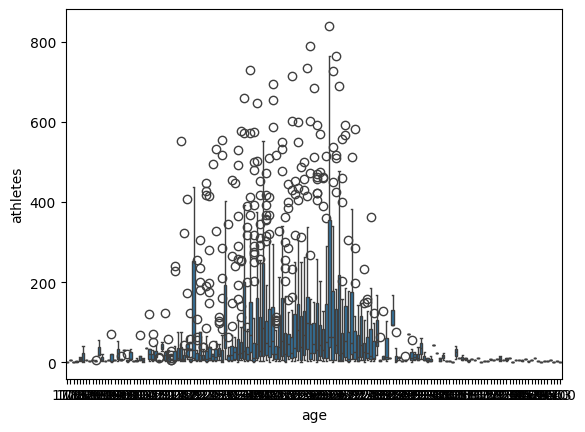

In [100]:
sns.boxplot(x="age",y="athletes",data=teams)

In [101]:
teams["age2"]=np.log(teams["age"])
teams

,year,events,athletes,age,prev_medals,medals,age2
0,1964,8,8,22.0,0.0,0,3.091042
1,1968,5,5,23.2,0.0,0,3.144152
2,1972,8,8,29.0,0.0,0,3.367296
3,1980,11,11,23.6,0.0,0,3.161247
4,2004,5,5,18.6,0.0,0,2.923162
...,...,...,...,...,...,...,...
2139,2000,19,26,25.0,0.0,0,3.218876
2140,2004,11,14,25.1,0.0,3,3.222868
2141,2008,15,16,26.1,3.0,4,3.261935
2142,2012,8,9,27.3,4.0,0,3.306887


In [102]:
teams=teams.drop(columns=["age2"])
teams

,year,events,athletes,age,prev_medals,medals
0,1964,8,8,22.0,0.0,0
1,1968,5,5,23.2,0.0,0
2,1972,8,8,29.0,0.0,0
3,1980,11,11,23.6,0.0,0
4,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...
2139,2000,19,26,25.0,0.0,0
2140,2004,11,14,25.1,0.0,3
2141,2008,15,16,26.1,3.0,4
2142,2012,8,9,27.3,4.0,0


In [103]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [104]:
train.shape

(1609, 6)

In [105]:
test.shape

(405, 6)